<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeightWatcher DenseNet

This Notebooks reproduces Figure 4(d) in our [Nature Paper](https://www.nature.com/articles/s41467-021-24025-8)

It demonstrates that the CorrelationFlow in DenseNet is all over the place

CorrelationFlow is a plot of the layer_id vs the WW Alpha $\alpha$ layer quality metric



### Key Idea in DenseNet 

Dense Connections: connect back to all previous Conv2d feature maps from all previous layers

https://www.jeremyjordan.me/convnet-architectures/#densenet

*"concatenating feature-maps learned by different layers increases variation in the input of subsequent layers and improves efficiency."*



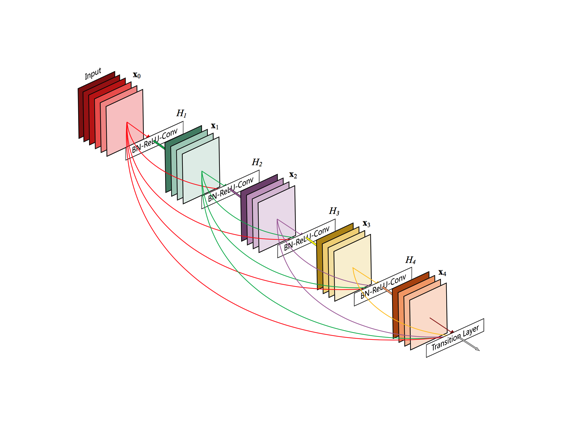

In [18]:
!touch densenet.png
from IPython.display import Image
Image(filename='densenet.png',width=400)

## Summary of Results

A great example of where the $\hat{\alpha}$ does not correlated at all, but the new p-Norm metric does.



In [2]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher


In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip install weightwatcher

In [4]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

import weightwatcher as ww
import torchvision.models as models

ww.__version__


'0.6.5'

### Create all models now

In [5]:
series_name = 'DenseNet'
all_names = [ 'densenet121', 'densenet169', 'densenet201', 'densenet161']
colors = ['blue', 'green', 'teal', 'red']

In [6]:
all_models = []
all_models.append(models.densenet121(pretrained=True))
all_models.append(models.densenet161(pretrained=True))
all_models.append(models.densenet169(pretrained=True))
all_models.append(models.densenet201(pretrained=True))


### Get reported accuracies from pytorch website

https://pytorch.org/docs/stable/torchvision/models.html


<pre>
<table class="docutils align-default">
<colgroup>
<col style="width: 55%" />
<col style="width: 22%" />
<col style="width: 22%" />
</colgroup>
<thead>
<thead>
<tr class="row-odd"><th class="head"><p>Network</p></th>
<th class="head"><p>Top-1 error</p></th>
<th class="head"><p>Top-5 error</p></th>
</tr>
</thead>
<tbody>

<tr class="row-even"><td><p>Densenet-121</p></td>
<td><p>25.35</p></td>
<td><p>7.83</p></td>
</tr>
<tr class="row-odd"><td><p>Densenet-169</p></td>
<td><p>24.00</p></td>
<td><p>7.00</p></td>
</tr>
<tr class="row-even"><td><p>Densenet-201</p></td>
<td><p>22.80</p></td>
<td><p>6.43</p></td>
</tr>
<tr class="row-odd"><td><p>Densenet-161</p></td>
<td><p>22.35</p></td>
<td><p>6.20</p></td>
</tr>

</tbody>
</table>
</pre>

In [7]:
top1_errors= {
    
    "densenet121": 25.35,
    "densenet169": 24.00,
    "densenet201": 22.80,
    "densenet161": 22.35 

}

In [8]:
top5_errors= {
    
    "densenet121": 7.83,
    "densenet169": 7.00,
    "densenet201": 6.43,
    "densenet161": 6.20 

}

#### Run WeightWatcher, collect summary and details (as dataframes) for all models

In [9]:
all_details = []
all_summaries = []
for im, name in enumerate(all_names):
    print(im, name)
    watcher = ww.WeightWatcher(model=all_models[im])
    details = watcher.analyze(ww2x=True, mp_fit=True)
    summary =  watcher.get_summary()
    all_summaries.append(summary)
    all_details.append(details)

INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
tensforflow version 2.1.0
keras       version 2.2.4-tf
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Using weightwatcher 0.2x style layer and slice iterator


0 densenet121


INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
tensforflow version 2.1.0
keras       version 2.2.4-tf
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Using weightwatcher 0.2x style layer and slice iterator


1 densenet169


INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
tensforflow version 2.1.0
keras       version 2.2.4-tf
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Using weightwatcher 0.2x style layer and slice iterator


2 densenet201


INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
tensforflow version 2.1.0
keras       version 2.2.4-tf
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Using weightwatcher 0.2x style layer and slice iterator


3 densenet161


In [14]:
plt.rcParams.update({'font.size': 16})
from pylab import rcParams

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7,7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

### Correlation Flow

In [15]:
def plot_correlation_flow(metric, ylabel, title, series_name,
    all_names, all_details, colors, log=False, valid_ids = [], save=False):
    
    transparency = 1.0
      
    if len(valid_ids) == 0:
        valid_ids = range(len(all_details)-1)
        idname='all'
    else:
        idname='fnl'
        
        
    for im, details in enumerate(all_details):
        if im in valid_ids:
            
            details = all_details[im]
            name = all_names[im]
            x = details.index.to_numpy()
            y = details[metric].to_numpy()
            if log:
                y = np.log10(np.array(y+0.000001, dtype=np.float))

            plt.scatter(x,y, label=name, color=colors[im])

    plt.legend()
    plt.title("Depth vs "+title+" "+ylabel)
    plt.xlabel("Layer id")
    plt.ylabel(ylabel)
    
    if save:
        figname = "img/{}_{}_{}_depth.png".format(series_name, idname, metric)
        print("saving {}".format(figname))
        plt.savefig(figname)
        plt.show()

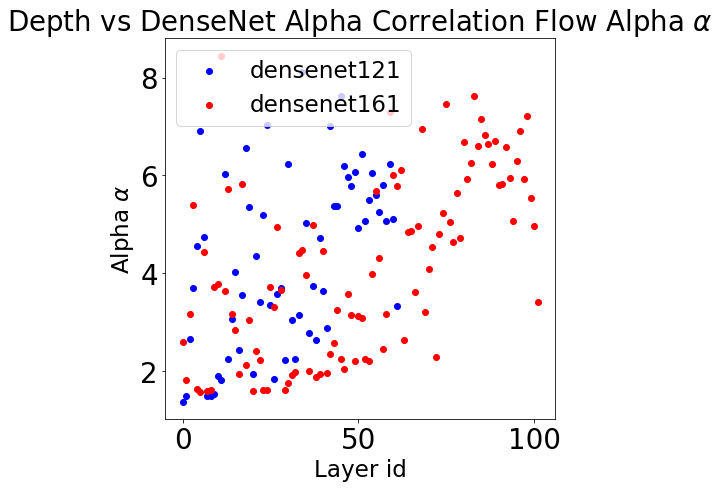

In [16]:
metric = "alpha"
xlabel = r"Alpha $\alpha$"
title = 'DenseNet Alpha Correlation Flow'
first_n_last_ids = [0, len(all_details)-1]
plot_correlation_flow(metric, xlabel, title, series_name, all_names, all_details, colors, log=False, valid_ids = first_n_last_ids)